# Google Play Store Apps Data


## I. Exploratory Data Analysis

## 1. Contents
https://www.kaggle.com/lava18/google-play-store-apps

## 2. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pylab import rcParams

## 3. Objectives 


## 4. Load Google Play Store Apps Data

In [2]:
data = pd.read_csv('googleplaystore.csv')
data.shape

(10841, 13)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Except for the "Rating" (float64) all the columns are object.

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


## 5. Explore the Data

### 5-1. Number of Missing Values by Column

In [5]:
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
Rating,1474,13.596532
Current Ver,8,0.073794
Android Ver,3,0.027673
Type,1,0.009224
Content Rating,1,0.009224
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000


Rating, Current Ver, Android Ver, Type and Content Rating have some missing values. Rating has the most missing value, at around 13.6%.

In [6]:
data.shape

(10841, 13)

### 5-2. "App" 

In [7]:
data['App'].describe()

count      10841
unique      9660
top       ROBLOX
freq           9
Name: App, dtype: object

In [8]:
# Unique "App" names
data['App'].value_counts().head(20)

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Duolingo: Learn Languages Free                        7
8 Ball Pool                                           7
ESPN                                                  7
Candy Crush Saga                                      7
Subway Surfers                                        6
Zombie Catchers                                       6
Nick                                                  6
Temple Run 2                                          6
Bubble Shooter                                        6
Helix Jump                                            6
Bleacher Report: sports news, scores, & highlights    6
Bowmasters                                            6
Sniper 3D Gun Shooter: Free Shooting Games - FPS      6
slither.io                                            6
Yahoo Fantasy Sports - #1 Rated Fantasy App           5
Farm Heroes Saga                                

There are multiple entries of the apps of the same names.

- What should be done to fix this?

In [9]:
# Set Index
data.set_index("App", inplace=True)
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


### 5-3. Category

In [10]:
data['Category'].describe()

count      10841
unique        34
top       FAMILY
freq        1972
Name: Category, dtype: object

In [11]:
# Unique "Cateogry"
data['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [12]:
print(len(data['Category'].unique()) , "categories")

34 categories


There is one category called "1.9" which looks like a mistake. 

In [13]:
data[data['Category']=='1.9']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


It seems that the info has not been properly entered into correct columns. So I decided to drop this row. 


In [14]:
# drop incorrect row
data.drop(data.index[data['Category'] == '1.9'], inplace = True)
data[data['Category']=='1.9']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,


##### Bar Plot: Distribution of Different Categories

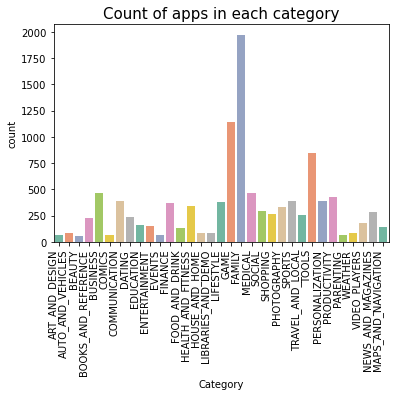

In [15]:
gc = sns.countplot(x="Category",data=data, palette = "Set2");
gc.set_xticklabels(gc.get_xticklabels(), rotation=90, ha="right");
gc
plt.title('Count of apps in each category',size = 15);

Category "Family" has the highest counts of apps, followed by "Games" and "Personalization."

### 5-4. Genres

In [16]:
data['Genres'].describe()

count     10840
unique      119
top       Tools
freq        842
Name: Genres, dtype: object

In [17]:
# Unique "Genres"
data['Genres'].value_counts()

Tools                         842
Entertainment                 623
Education                     549
Medical                       463
Business                      460
                             ... 
Comics;Creativity               1
Board;Pretend Play              1
Card;Brain Games                1
Lifestyle;Pretend Play          1
Health & Fitness;Education      1
Name: Genres, Length: 119, dtype: int64

In [18]:
print( len(data['Genres'].unique()) , "genres")

119 genres


##### Bar Plot: Distribution of Different Genres

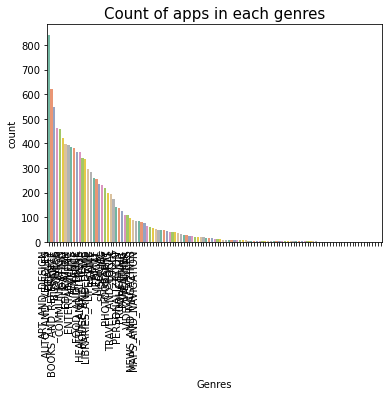

In [19]:
gg = sns.countplot(x="Genres",data=data, palette = "Set2",order=data['Genres'].value_counts().index);
gg.set_xticklabels(gc.get_xticklabels(), rotation=90, ha="right");
gg
plt.title('Count of apps in each genres',size = 15);

We can see that there is skewed distribution for "Genres," which can be a potential cause for a bias. Therefore, decided to get rid of the sub genres (that starts after ";") and just use the bigger genres.

In [20]:
data['Genres'] = data['Genres'].str.split(';').str[0]

In [21]:
print( len(data['Genres'].unique()) , "genres")
print("\n", data['Genres'].unique())

48 genres

 ['Art & Design' 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business'
 'Comics' 'Communication' 'Dating' 'Education' 'Entertainment' 'Events'
 'Finance' 'Food & Drink' 'Health & Fitness' 'House & Home'
 'Libraries & Demo' 'Lifestyle' 'Adventure' 'Arcade' 'Casual' 'Card'
 'Action' 'Strategy' 'Puzzle' 'Sports' 'Music' 'Word' 'Racing'
 'Simulation' 'Board' 'Trivia' 'Role Playing' 'Educational'
 'Music & Audio' 'Video Players & Editors' 'Medical' 'Social' 'Shopping'
 'Photography' 'Travel & Local' 'Tools' 'Personalization' 'Productivity'
 'Parenting' 'Weather' 'News & Magazines' 'Maps & Navigation' 'Casino']


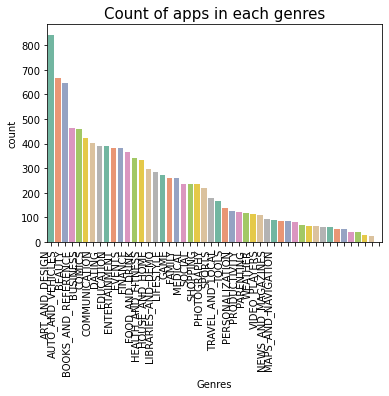

In [22]:
gg = sns.countplot(x="Genres",data=data, palette = "Set2",order=data['Genres'].value_counts().index);
gg.set_xticklabels(gc.get_xticklabels(), rotation=90, ha="right");
gg
plt.title('Count of apps in each genres',size = 15);

Some of the Categories and Genres have overlap in values. 

### Genres and Category

In [23]:
(data[data.Category != data.Genres]
 .groupby('Category')['Genres']
 .value_counts())

Category             Genres                 
ART_AND_DESIGN       Art & Design                65
AUTO_AND_VEHICLES    Auto & Vehicles             85
BEAUTY               Beauty                      53
BOOKS_AND_REFERENCE  Books & Reference          231
BUSINESS             Business                   460
                                               ... 
SPORTS               Sports                     384
TOOLS                Tools                      843
TRAVEL_AND_LOCAL     Travel & Local             258
VIDEO_PLAYERS        Video Players & Editors    175
WEATHER              Weather                     82
Name: Genres, Length: 71, dtype: int64

In [24]:
data[['Category', 'Genres']].nunique()

Category    33
Genres      48
dtype: int64

In [25]:
data[data.Category != data.Genres]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design,15-Jan-18,2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up


### 5-5. Rating

In [26]:
data['Rating'].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [27]:
# Unique "Rating"
data['Rating'].value_counts()

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.6      25
2.7      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

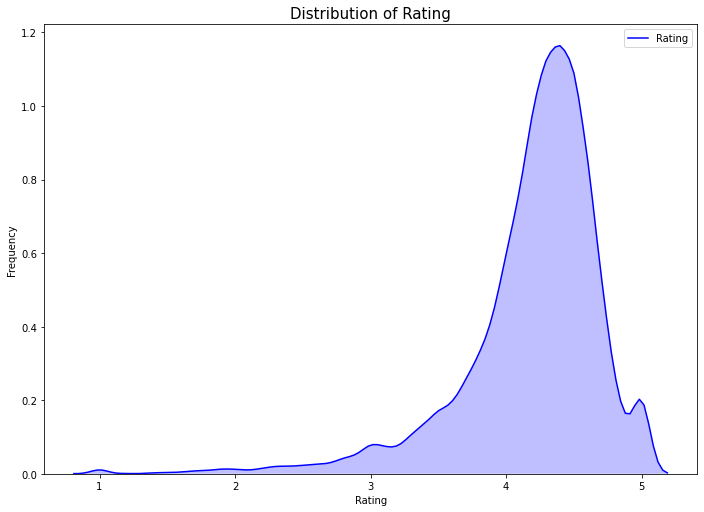

In [28]:
rcParams['figure.figsize'] = 11.7,8.27;
gr = sns.kdeplot(data.Rating, color="blue", shade = True);
gr.set_xlabel("Rating");
gr.set_ylabel("Frequency");
plt.title('Distribution of Rating',size = 15);

In [29]:
data.Rating.mean()

4.191757420456978

Rating had 13.6% of its data missing. 

### 5-6. Content Rating

In [30]:
data['Content Rating'].describe()

count        10840
unique           6
top       Everyone
freq          8714
Name: Content Rating, dtype: object

In [31]:
# Unique "Content Rating"
data['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

### Barplot: Content Rating

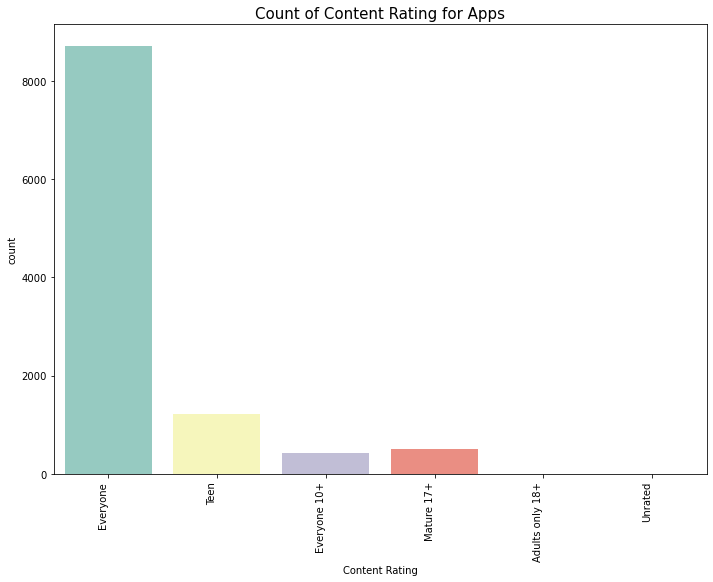

In [32]:
gcr = sns.countplot(x="Content Rating",data=data, palette = "Set3");
gcr.set_xticklabels(gcr.get_xticklabels(), rotation=90, ha="right");
gcr
plt.title('Count of Content Rating for Apps',size = 15);

There are 2 entries of "Unrated," and 3 entries of "Adults only 18+."

In [33]:
data[data['Content Rating']=='Unrated']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Best CG Photography,FAMILY,NaN,1,2.5M,500+,Free,0,Unrated,Entertainment,24-Jun-15,5.2,3.0 and up
DC Universe Online Map,TOOLS,4.1,1186,6.4M,"50,000+",Free,0,Unrated,Tools,27-Feb-12,1.3,2.3.3 and up


In [34]:
data[data['Content Rating']=='Adults only 18+']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Manga Master - Best manga & comic reader,COMICS,4.6,24005,4.9M,"500,000+",Free,0,Adults only 18+,Comics,4-Jul-18,1.1.7.0,4.1 and up
DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41M,"1,000,000+",Free,0,Adults only 18+,Sports,24-Jul-18,3.21.324,4.4 and up
Manga Books,COMICS,3.8,7326,Varies with device,"500,000+",Free,0,Adults only 18+,Comics,3-Aug-18,Varies with device,Varies with device


Are there any relationship between "Rating" and "Content Rating"?

#### Boxplot of Rating and Content Rating

Text(0.5, 1.0, 'Box plot Rating vs. Content Rating')

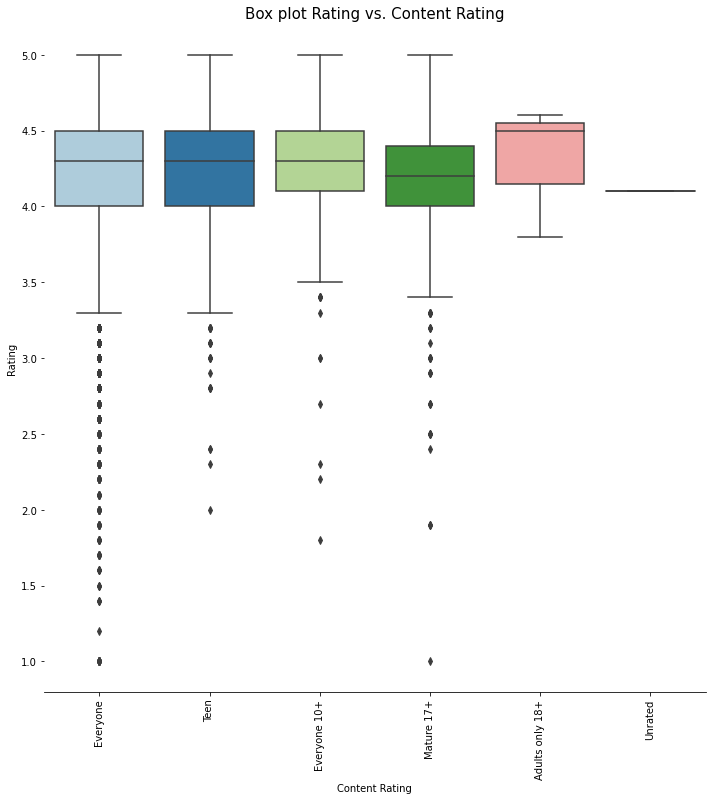

In [35]:
grcr = sns.catplot(x="Content Rating",y="Rating",data=data, kind="box", height = 10 ,palette = "Paired")
grcr.despine(left=True)
grcr.set_xticklabels(rotation=90)
grcr = grcr.set_ylabels("Rating")
plt.title('Box plot Rating vs. Content Rating',size = 15)

There was no noticeable pattern in rating in terms of content rating.

### 5-7. Reviews

In [36]:
data['Reviews'].describe()

count     10840
unique     6001
top           0
freq        596
Name: Reviews, dtype: object

In [37]:
# Convert "Reviews" into integers
data['Reviews'] = data['Reviews'].apply(lambda x: int(x))
data['Reviews'].head()

App
Photo Editor & Candy Camera & Grid & ScrapBook           159
Coloring book moana                                      967
U Launcher Lite – FREE Live Cool Themes, Hide Apps     87510
Sketch - Draw & Paint                                 215644
Pixel Draw - Number Art Coloring Book                    967
Name: Reviews, dtype: int64

In [38]:
# Unique "Reviews"
data['Reviews'].value_counts()

0          596
1          272
2          214
3          175
4          137
          ... 
155693       1
12443        1
163997       1
37023        1
1385093      1
Name: Reviews, Length: 6001, dtype: int64

#### Distribution of Number of Reviews

Text(0.5, 1.0, 'Distribution of Reveiw')

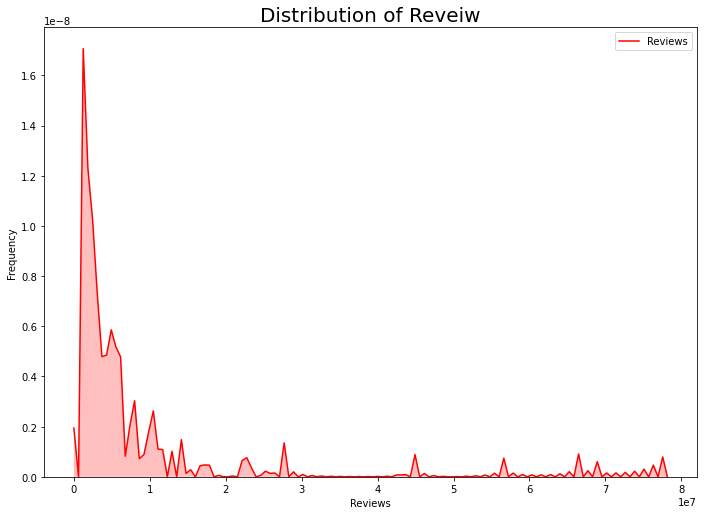

In [39]:
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(data.Reviews, color="Red", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reveiw',size = 20)

### 5-8. Size

In [40]:
data['Size'].describe()

count                  10840
unique                   461
top       Varies with device
freq                    1695
Name: Size, dtype: object

In [41]:
# Unique "Size"
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Can see that there are values with different measurement (i.e. ks and Ms) and some values "Varies with device."

In [42]:
data['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
506k                     1
881k                     1
695k                     1
308k                     1
317k                     1
Name: Size, Length: 461, dtype: int64

In [43]:
data[data['Size']== 'Varies with device']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,14-Jul-18,Varies with device,2.3.3 and up
Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,30-Jul-18,Varies with device,Varies with device
Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,30-Jul-18,Varies with device,Varies with device
Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,30-Jul-18,Varies with device,Varies with device
REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,25-May-18,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...
My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,24-Jul-18,Varies with device,Varies with device
Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,27-Sep-17,Varies with device,4.4 and up
Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,23-May-18,Varies with device,Varies with device


In [44]:
# Removing "M"s and replace "k" by dividing it by 1000 -  cpmvert it to Ms
data['Size'] = data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

data['Size'] = data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

data['Size'] = data['Size'].apply(lambda x: float(x))

In [45]:
data['Size'].value_counts()

11.000    198
12.000    196
14.000    194
13.000    191
15.000    184
         ... 
0.027       1
0.642       1
0.647       1
0.039       1
0.942       1
Name: Size, Length: 459, dtype: int64

In [46]:
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design,15-Jan-18,2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design,20-Jun-18,1.1,4.4 and up


### 5-9. Installs

In [47]:
data['Installs'].describe()

count          10840
unique            21
top       1,000,000+
freq            1579
Name: Installs, dtype: object

In [48]:
# Unique "Installs"
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [49]:
data['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [50]:
# Remove "+"s
data.Installs = data.Installs.apply(lambda x: x.replace(',',''))
data.Installs = data.Installs.apply(lambda x: x.replace('+',''))
data.Installs = data.Installs.apply(lambda x: int(x))

Note that 0+ is merged with 0s.

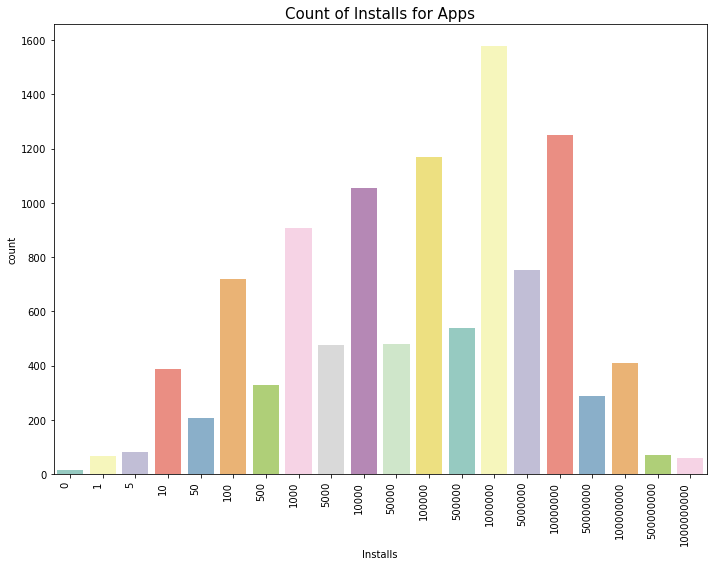

In [51]:
gi = sns.countplot(x="Installs",data=data, palette = "Set3");
gi .set_xticklabels(gi.get_xticklabels(), rotation=90, ha="right");
gi
plt.title('Count of Installs for Apps',size = 15);

### 5-10. Type

In [52]:
data['Type'].describe()

count     10839
unique        2
top        Free
freq      10039
Name: Type, dtype: object

In [53]:
# Unique "Type"
data['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [54]:
data['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

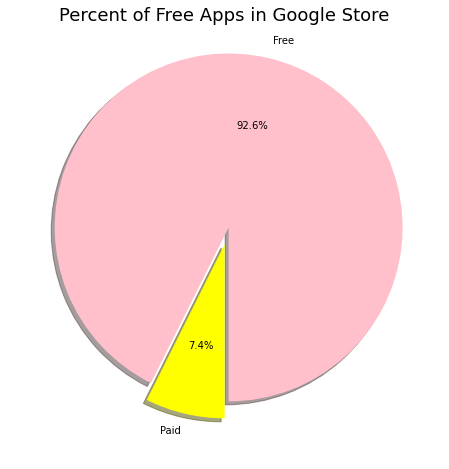

In [55]:
# Plot pie chart
labels =data['Type'].value_counts(sort = True).index
sizes = data['Type'].value_counts(sort = True)

colors = ["pink","yellow"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of Free Apps in Google Store',size = 18)
plt.show()

In [56]:
# 0 - Free, 1 - Paid
# df['Type'] = pd.factorize(df['Type'])[0]
#print(df.dtypes)

### 5-11. Price

In [57]:
data['Price'].describe()

count     10840
unique       92
top           0
freq      10040
Name: Price, dtype: object

In [58]:
# Unique "Price"
data['Price'].unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$1.49 ', '$2.99 ', '$7.99 ',
       '$5.99 ', '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ',
       '$9.00 ', '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ',
       '$16.99 ', '$14.99 ', '$1.00 ', '$29.99 ', '$12.99 ', '$2.49 ',
       '$10.99 ', '$1.50 ', '$19.99 ', '$15.99 ', '$33.99 ', '$74.99 ',
       '$39.99 ', '$3.95 ', '$4.49 ', '$1.70 ', '$8.99 ', '$2.00 ',
       '$3.88 ', '$25.99 ', '$399.99 ', '$17.99 ', '$400.00 ', '$3.02 ',
       '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ', '$2.50 ', '$1.59 ',
       '$6.49 ', '$1.29 ', '$5.00 ', '$13.99 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$19.90 ', '$8.49 ', '$1.75 ',
       '$14.00 ', '$4.85 ', '$46.99 ', '$109.99 ', '$154.99 ', '$3.08 ',
       '$2.59 ', '$4.80 ', '$1.96 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$4.29 ', '$2.60 ', '$3.28 ', '$4.60 ',
       '$28.99 ', '$2.95 ', '$2.90 ', '$1.97 ', '$200.00 ', '$89.99 ',
       '$2.56 '

In [59]:
# Remove the dollar sign and make the variable float
data.Price = data.Price.apply(lambda x: x.replace('$',''))
data['Price'] = data['Price'].apply(lambda x: float(x))

In [60]:
data['Price'].describe()

count    10840.000000
mean         1.027368
std         15.949703
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

Max for price is $400!

In [61]:
data['Price'].value_counts()

0.00    10040
0.99      148
2.99      129
1.99       73
4.99       72
        ...  
1.20        1
1.59        1
2.56        1
1.61        1
1.04        1
Name: Price, Length: 92, dtype: int64

### 5-12. Last Updated

In [62]:
data['Last Updated'].describe()

count        10840
unique        1377
top       3-Aug-18
freq           326
Name: Last Updated, dtype: object

In [63]:
# Unique "Installs"
data['Last Updated'].unique()

array(['7-Jan-18', '15-Jan-18', '1-Aug-18', ..., '20-Jan-14', '16-Feb-14',
       '23-Mar-14'], dtype=object)

In [64]:
data['Last Updated'].value_counts()

3-Aug-18     326
2-Aug-18     304
31-Jul-18    294
1-Aug-18     285
30-Jul-18    211
            ... 
20-Dec-15      1
8-Jul-17       1
22-Jun-17      1
1-Jan-15       1
24-Aug-12      1
Name: Last Updated, Length: 1377, dtype: int64

In [65]:
#Convert to datetime object
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data['Last Updated'].describe()

count                   10840
unique                   1377
top       2018-08-03 00:00:00
freq                      326
first     2010-05-21 00:00:00
last      2018-08-08 00:00:00
Name: Last Updated, dtype: object

In [66]:
data['Last Updated'].max() 

Timestamp('2018-08-08 00:00:00')

In [67]:
data['Last Updated'].min()

Timestamp('2010-05-21 00:00:00')

In order to include "Last Updated" into the machine learning model, I have decided to only select the month that the applications have been last updated. 

In [68]:
data['Month'] = data['Last Updated'].dt.month

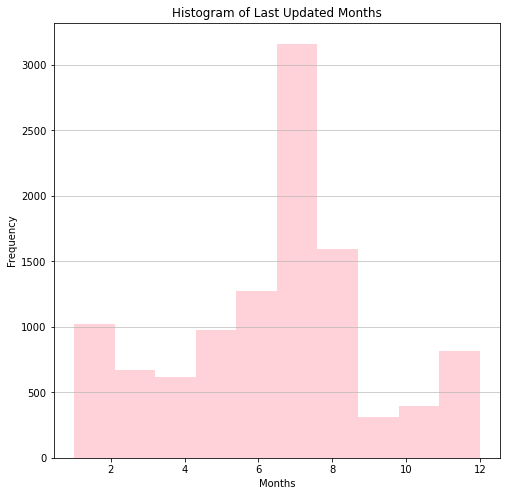

In [69]:
plt.hist(data['Month'],color='pink', alpha=0.7)
plt.grid(axis='y', alpha=0.75);
plt.xlabel('Months');
plt.ylabel('Frequency');
plt.title('Histogram of Last Updated Months');

### 5-13. Current Ver

In [70]:
data['Current Ver'].describe()

count                  10832
unique                  2783
top       Varies with device
freq                    1459
Name: Current Ver, dtype: object

In [71]:
# Unique "Current Ver"
data['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

### 5-14. Android Ver

In [72]:
data['Android Ver'].describe()

count          10838
unique            33
top       4.1 and up
freq            2451
Name: Android Ver, dtype: object

In [73]:
# Unique "Android Ver"
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

## 6. Exploring Potential Questions:

### 6-1) Rating vs. Review
Apps with more reviews tend to have better rating

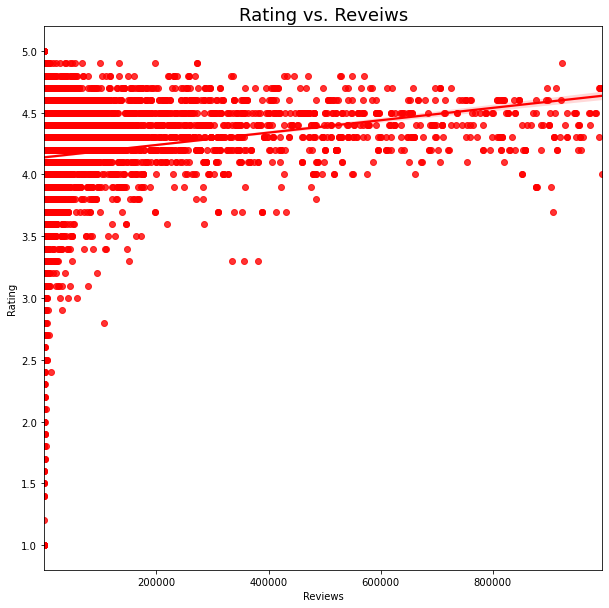

In [74]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'red',data=data[data['Reviews']<1000000]);
plt.title('Rating vs. Reveiws',size = 18);

### 6-2) Rating vs. Price
Expensive apps tend to have lower rating

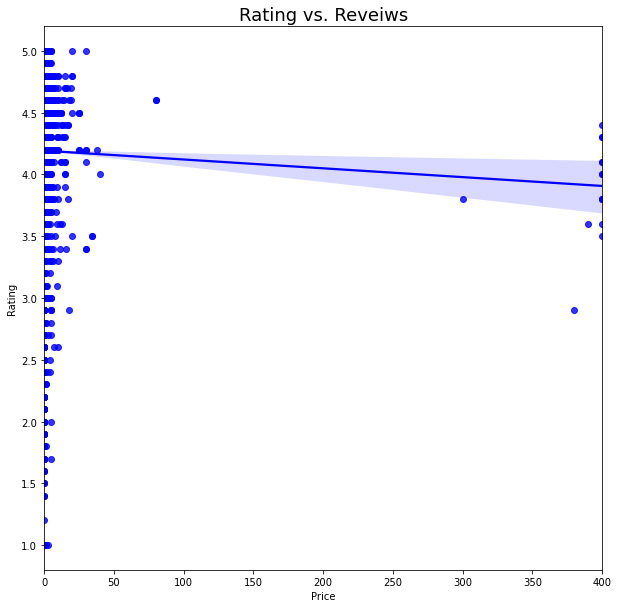

In [75]:
plt.figure(figsize = (10,10))
sns.regplot(x="Price", y="Rating", color = 'blue',data=data[data['Price']<1000000]);
plt.title('Rating vs. Reveiws',size = 18);

### 6-3) Rating vs. Installs
Apps with larger number of installs have greater rating

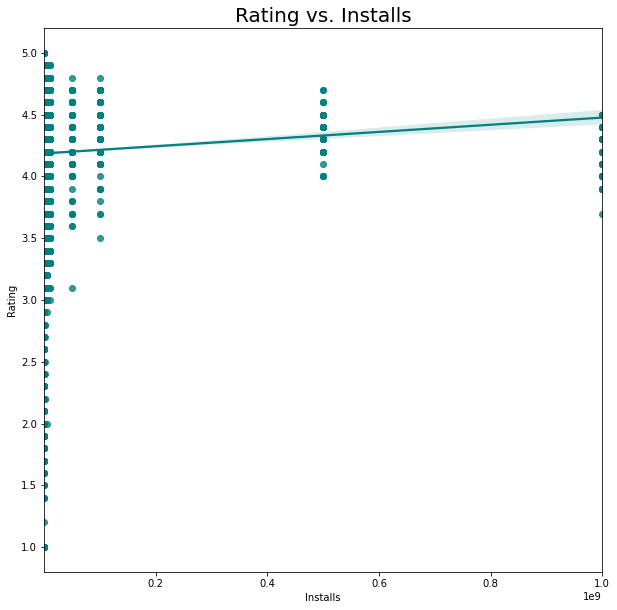

In [76]:
plt.figure(figsize = (10,10))
sns.regplot(x="Installs", y="Rating", color = 'teal',data=data);
plt.title('Rating vs. Installs',size = 20);

### 6-4) Rating vs. Last Updated

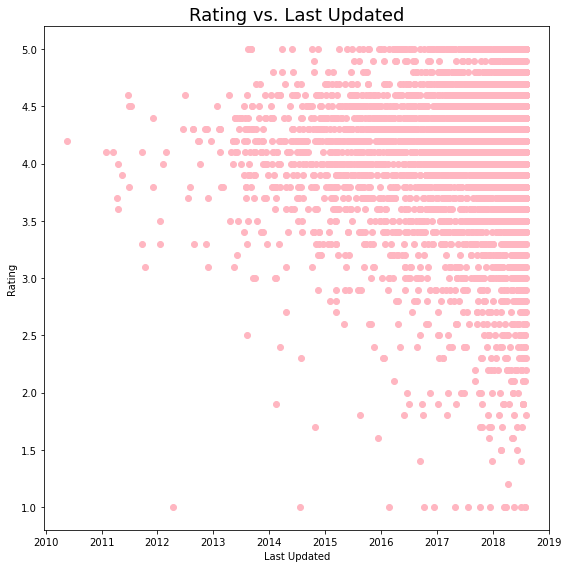

In [77]:
plt.plot_date(data["Last Updated"],data["Rating"],color = 'lightpink')
plt.title('Rating vs. Last Updated',size = 18);
plt.xlabel('Last Updated');
plt.ylabel('Rating');
plt.tight_layout();
plt.show();

### 6-5) Last Updated vs. Reviews

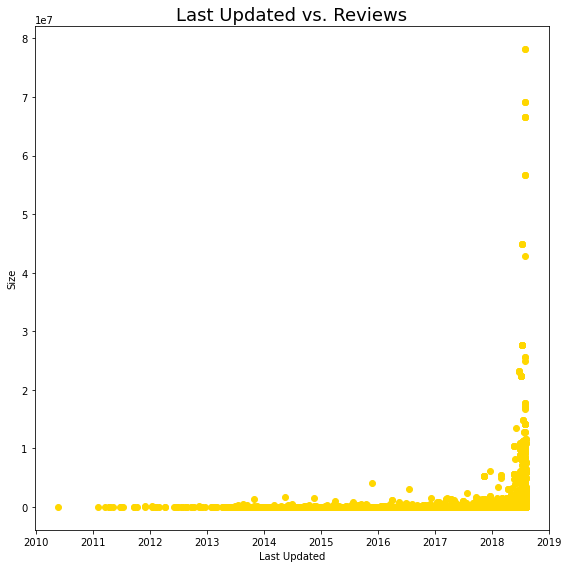

In [78]:
plt.plot_date(data["Last Updated"],data["Reviews"],color = 'gold')
plt.title('Last Updated vs. Reviews',size = 18);
plt.xlabel('Last Updated');
plt.ylabel('Size');
plt.tight_layout();
plt.show();

### 6-6) Last Updated vs. Price

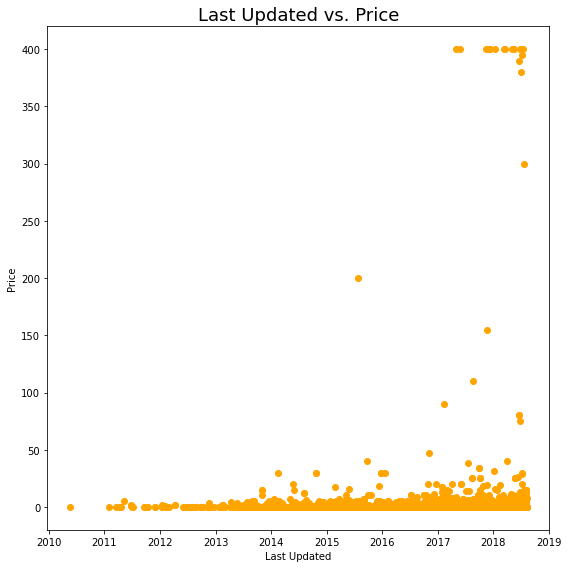

In [79]:
plt.plot_date(data["Last Updated"],data["Price"],color = 'orange')
plt.title('Last Updated vs. Price',size = 18);
plt.xlabel('Last Updated');
plt.ylabel('Price');
plt.tight_layout();
plt.show();

### 6-7) Last Updated vs. Installs

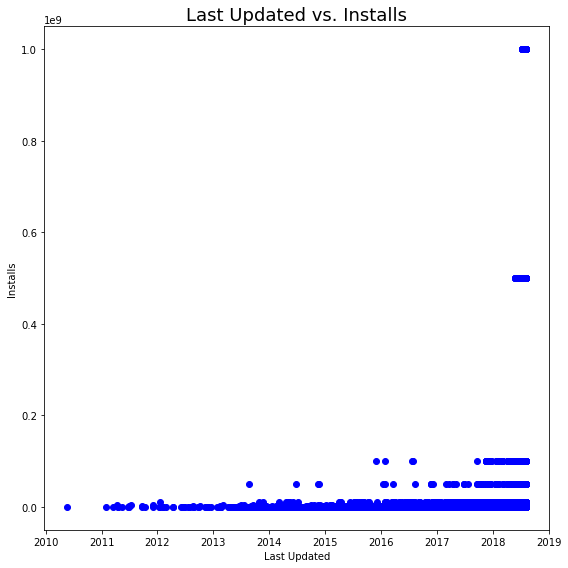

In [80]:
plt.plot_date(data["Last Updated"],data["Installs"],color = 'blue')
plt.title('Last Updated vs. Installs',size = 18);
plt.xlabel('Last Updated');
plt.ylabel('Installs');
plt.tight_layout();
plt.show();

### 6-8) Last Updated vs. Size

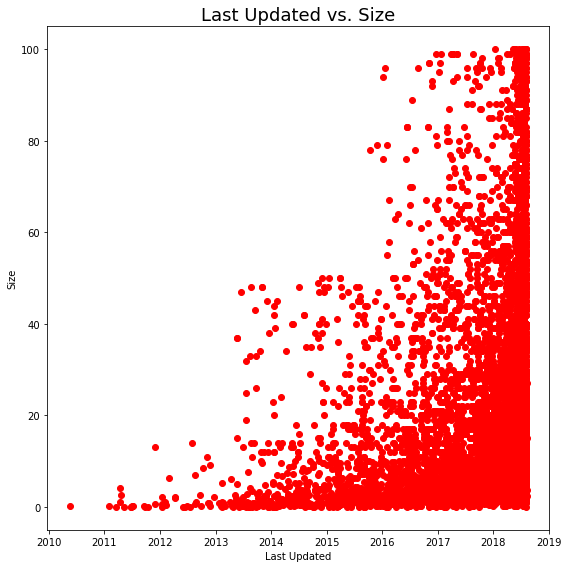

In [81]:
plt.plot_date(data["Last Updated"],data["Size"],color = 'red')
plt.title('Last Updated vs. Size',size = 18);
plt.xlabel('Last Updated');
plt.ylabel('Size');
plt.tight_layout();
plt.show();

## 7. Export the Data

In [82]:
data.to_csv('googleplaystore_1eda.csv', index = False)

## III. Preprocessing

#### - Given all these variables, can we predict when someone updates for the last time?
#### - Given the state of the applciations, can we predict what the rating of the applications would be? 

In [83]:
from sklearn import __version__ as sklearn_version
from sklearn import metrics, svm
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [84]:
# Sort by "Category"
data.sort_values("Category", inplace = True)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, Photo Editor & Candy Camera & Grid & ScrapBook to Real time Weather Forecast
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Category        10840 non-null  object        
 1   Rating          9366 non-null   float64       
 2   Reviews         10840 non-null  int64         
 3   Size            9145 non-null   float64       
 4   Installs        10840 non-null  int64         
 5   Type            10839 non-null  object        
 6   Price           10840 non-null  float64       
 7   Content Rating  10840 non-null  object        
 8   Genres          10840 non-null  object        
 9   Last Updated    10840 non-null  datetime64[ns]
 10  Current Ver     10832 non-null  object        
 11  Android Ver     10838 non-null  object        
 12  Month           10840 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), o

"Current Ver" and "Android Ver" will not be included in our model, and therefore will be dropped. 

In [86]:
df = data
df = df.drop(columns = ['Current Ver', 'Android Ver'], axis=1) #axis=1: drop column
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Month
App,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.00,Everyone,Art & Design,2018-01-07,1
How to draw Ladybug and Cat Noir,ART_AND_DESIGN,3.8,564,9.2,100000,Free,0.00,Everyone,Art & Design,2018-07-11,7
UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24.0,500000,Free,0.00,Everyone,Art & Design,2018-08-02,8
Floor Plan Creator,ART_AND_DESIGN,4.1,36639,NaN,5000000,Free,0.00,Everyone,Art & Design,2018-07-14,7
PIP Camera - PIP Collage Maker,ART_AND_DESIGN,4.7,158,11.0,10000,Free,0.00,Everyone,Art & Design,2017-11-29,11
...,...,...,...,...,...,...,...,...,...,...,...
wetter.com - Weather and Radar,WEATHER,4.2,189310,38.0,10000000,Free,0.00,Everyone,Weather,2018-08-06,8
Yahoo Weather,WEATHER,4.4,1312037,NaN,10000000,Free,0.00,Everyone,Weather,2018-08-01,8
Klara weather,WEATHER,4.6,36900,4.8,500000,Free,0.00,Everyone,Weather,2018-07-28,7


To deal with different types of models, I will create different set of dataframes. 
- df 
- df_int: all numeric through integer encoding with missing values
- df_dum: all numeric through dummy coding with missing values
- df_num/dum_immean: all numeric with missing values imputed with mean
- df_num/dum_immed: all numeric with missing values imputed with median 

## 1. Integer Encoding 

### Convert all the variables into numerical format

In [87]:
df_int = df
df_int.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, Photo Editor & Candy Camera & Grid & ScrapBook to Real time Weather Forecast
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Category        10840 non-null  object        
 1   Rating          9366 non-null   float64       
 2   Reviews         10840 non-null  int64         
 3   Size            9145 non-null   float64       
 4   Installs        10840 non-null  int64         
 5   Type            10839 non-null  object        
 6   Price           10840 non-null  float64       
 7   Content Rating  10840 non-null  object        
 8   Genres          10840 non-null  object        
 9   Last Updated    10840 non-null  datetime64[ns]
 10  Month           10840 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 1016.2+ KB


"Category", "Type", "Content Rating", and "Genres" are string objects and therefore will be converted into numeric values

#### 1) Cateogry

In [88]:
# Cleaning Categories into integers
CategoryString = df["Category"]
categoryVal = df["Category"].unique()
categoryValCount = len(categoryVal)
category_dict = {}
for i in range(0,categoryValCount):
    category_dict[categoryVal[i]] = i
df["Category_int"] = df["Category"].map(category_dict).astype(int)

In [89]:
category_dict

{'ART_AND_DESIGN': 0,
 'AUTO_AND_VEHICLES': 1,
 'BEAUTY': 2,
 'BOOKS_AND_REFERENCE': 3,
 'BUSINESS': 4,
 'COMICS': 5,
 'COMMUNICATION': 6,
 'DATING': 7,
 'EDUCATION': 8,
 'ENTERTAINMENT': 9,
 'EVENTS': 10,
 'FAMILY': 11,
 'FINANCE': 12,
 'FOOD_AND_DRINK': 13,
 'GAME': 14,
 'HEALTH_AND_FITNESS': 15,
 'HOUSE_AND_HOME': 16,
 'LIBRARIES_AND_DEMO': 17,
 'LIFESTYLE': 18,
 'MAPS_AND_NAVIGATION': 19,
 'MEDICAL': 20,
 'NEWS_AND_MAGAZINES': 21,
 'PARENTING': 22,
 'PERSONALIZATION': 23,
 'PHOTOGRAPHY': 24,
 'PRODUCTIVITY': 25,
 'SHOPPING': 26,
 'SOCIAL': 27,
 'SPORTS': 28,
 'TOOLS': 29,
 'TRAVEL_AND_LOCAL': 30,
 'VIDEO_PLAYERS': 31,
 'WEATHER': 32}

#### 2) Genre

In [90]:
GenresVal = df.Genres.unique()
genres_dict = {}
for i in range(len(GenresVal)):
    genres_dict[GenresVal[i]] = i
df['Genres_int'] = df_int['Genres'].map(genres_dict).astype(int)

In [91]:
genres_dict

{'Art & Design': 0,
 'Auto & Vehicles': 1,
 'Beauty': 2,
 'Books & Reference': 3,
 'Business': 4,
 'Comics': 5,
 'Communication': 6,
 'Dating': 7,
 'Education': 8,
 'Entertainment': 9,
 'Events': 10,
 'Casual': 11,
 'Simulation': 12,
 'Puzzle': 13,
 'Role Playing': 14,
 'Strategy': 15,
 'Educational': 16,
 'Adventure': 17,
 'Health & Fitness': 18,
 'Lifestyle': 19,
 'Arcade': 20,
 'Action': 21,
 'Racing': 22,
 'Video Players & Editors': 23,
 'Sports': 24,
 'Trivia': 25,
 'Card': 26,
 'Board': 27,
 'Music & Audio': 28,
 'Music': 29,
 'Finance': 30,
 'Food & Drink': 31,
 'Word': 32,
 'Casino': 33,
 'House & Home': 34,
 'Libraries & Demo': 35,
 'Maps & Navigation': 36,
 'Medical': 37,
 'News & Magazines': 38,
 'Parenting': 39,
 'Personalization': 40,
 'Photography': 41,
 'Productivity': 42,
 'Shopping': 43,
 'Social': 44,
 'Tools': 45,
 'Travel & Local': 46,
 'Weather': 47}

#### 3) Type

In [92]:
#Converting Type classification into binary
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

df['Type_int'] = df['Type'].map(type_cat)

#### 4) Content Rating

In [93]:
RatingVal = df['Content Rating'].unique()
rating_dict = {}
for i in range(len(RatingVal)):
    rating_dict[RatingVal[i]] = i
df['ContentRating_int'] = df['Content Rating'].map(rating_dict).astype(int)

In [94]:
rating_dict

{'Everyone': 0,
 'Teen': 1,
 'Everyone 10+': 2,
 'Mature 17+': 3,
 'Adults only 18+': 4,
 'Unrated': 5}

##### Make sure that other variables are all numeric as well

In [95]:
# Change datatype
df['Reviews'] = pd.to_numeric(df['Reviews'])
df['Installs'] = pd.to_numeric(df['Installs'])
df['Price'] = pd.to_numeric(df['Price'])

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, Photo Editor & Candy Camera & Grid & ScrapBook to Real time Weather Forecast
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Category           10840 non-null  object        
 1   Rating             9366 non-null   float64       
 2   Reviews            10840 non-null  int64         
 3   Size               9145 non-null   float64       
 4   Installs           10840 non-null  int64         
 5   Type               10839 non-null  object        
 6   Price              10840 non-null  float64       
 7   Content Rating     10840 non-null  object        
 8   Genres             10840 non-null  object        
 9   Last Updated       10840 non-null  datetime64[ns]
 10  Month              10840 non-null  int64         
 11  Category_int       10840 non-null  int32         
 12  Genres_int         10840 non-null  int32         
 13  

## 2. Missing Values 

In [97]:
total=df.isnull().sum()
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Category,0,0.000000
Rating,1474,0.135978
Reviews,0,0.000000
Size,1695,0.156365
Installs,0,0.000000
Type,1,0.000092
Price,0,0.000000
Content Rating,0,0.000000
Genres,0,0.000000
Last Updated,0,0.000000


Rating and Size have over 1000 missing values.

I will impute the missing values with the means for the Rating and Size

### 2-1) Imputed with Mean

#### Rating - impute with mean

In [98]:
# Replace "NaN" with mean 
imputer = SimpleImputer()
df['Rating_mean'] = imputer.fit_transform(df[['Rating']])

#### Size - Impute with mean

In [99]:
# Replace "NaN" with mean 
df['Size_mean'] = imputer.fit_transform(df[['Size']])

In [100]:
total=df.isnull().sum()
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Category,0,0.000000
Rating,1474,0.135978
Reviews,0,0.000000
Size,1695,0.156365
Installs,0,0.000000
Type,1,0.000092
Price,0,0.000000
Content Rating,0,0.000000
Genres,0,0.000000
Last Updated,0,0.000000


### Imputed with Median: df_num_immed

#### Rating - impute with median

In [101]:
# Replace "NaN" with median
df['Rating_med'] = imputer.fit_transform(df[['Rating']])

#### Size - impute with median

In [102]:
# Replace "NaN" with median
df['Size_med'] = imputer.fit_transform(df[['Size']])

In [103]:
total=df.isnull().sum()
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Category,0,0.000000
Rating,1474,0.135978
Reviews,0,0.000000
Size,1695,0.156365
Installs,0,0.000000
Type,1,0.000092
Price,0,0.000000
Content Rating,0,0.000000
Genres,0,0.000000
Last Updated,0,0.000000


## 3. Dummy Coding 

##### Dummy Code

In [104]:
# for dummy variable encoding for Categories
df2 = pd.get_dummies(df, columns=['Category', 'Genres', 'Content Rating'],drop_first=True)

In [105]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, Photo Editor & Candy Camera & Grid & ScrapBook to Real time Weather Forecast
Data columns (total 100 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Rating                          9366 non-null   float64       
 1   Reviews                         10840 non-null  int64         
 2   Size                            9145 non-null   float64       
 3   Installs                        10840 non-null  int64         
 4   Type                            10839 non-null  object        
 5   Price                           10840 non-null  float64       
 6   Last Updated                    10840 non-null  datetime64[ns]
 7   Month                           10840 non-null  int64         
 8   Category_int                    10840 non-null  int32         
 9   Genres_int                      10840 non-null  int32         
 10  Type_int

##### Binary 

In [106]:
#Converting Type classification into binary
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

df2['Type'] = df2['Type'].map(type_cat)

##### Impute

In [107]:
#Impute with Median
df2['Rating'] = imputer.fit_transform(df2[['Rating']])

In [108]:
df2['Size'] = imputer.fit_transform(df2[['Size']])

In [109]:
df2.head()

,Rating,Reviews,Size,Installs,Type,Price,Last Updated,Month,Category_int,Genres_int,...,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
App,,,,,,,,,,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.00000,10000,0,0.0,2018-01-07,1,0,0,...,0,0,0,0,0,1,0,0,0,0
How to draw Ladybug and Cat Noir,3.8,564,9.20000,100000,0,0.0,2018-07-11,7,0,0,...,0,0,0,0,0,1,0,0,0,0
UNICORN - Color By Number & Pixel Art Coloring,4.7,8145,24.00000,500000,0,0.0,2018-08-02,8,0,0,...,0,0,0,0,0,1,0,0,0,0
Floor Plan Creator,4.1,36639,21.51653,5000000,0,0.0,2018-07-14,7,0,0,...,0,0,0,0,0,1,0,0,0,0
PIP Camera - PIP Collage Maker,4.7,158,11.00000,10000,0,0.0,2017-11-29,11,0,0,...,0,0,0,0,0,1,0,0,0,0


In [110]:
df2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Last Updated', 'Month', 'Category_int', 'Genres_int', 'Type_int',
       'ContentRating_int', 'Rating_mean', 'Size_mean', 'Rating_med',
       'Size_med', 'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       'Category_COMMUNICATION', 'Category_DATING', 'Category_EDUCATION',
       'Category_ENTERTAINMENT', 'Category_EVENTS', 'Category_FAMILY',
       'Category_FINANCE', 'Category_FOOD_AND_DRINK', 'Category_GAME',
       'Category_HEALTH_AND_FITNESS', 'Category_HOUSE_AND_HOME',
       'Category_LIBRARIES_AND_DEMO', 'Category_LIFESTYLE',
       'Category_MAPS_AND_NAVIGATION', 'Category_MEDICAL',
       'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category

##### Last Updated

Should I include "Last Updated" variable to a model?
If so, how?

## IV. Training and Modeling

### Set Up for Evaluation of Models Using Different Metrics 

In [111]:
#for evaluation of error term and 
def Evaluationmatrix(y_true, y_predict):
    print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_true,y_predict)))
    print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_true,y_predict)))
    print ('Mean squared Log Error: '+ str(metrics.mean_squared_log_error(y_true,y_predict)))

In [112]:
#to add into results_index for evaluation of error term 
def Evaluationmatrix_dict(y_true, y_predict, name = 'Linear - Integer'):
    dict_matrix = {}
    dict_matrix['Series Name'] = name
    dict_matrix['Mean Squared Error'] = metrics.mean_squared_error(y_true,y_predict)
    dict_matrix['Mean Absolute Error'] = metrics.mean_absolute_error(y_true,y_predict)
    dict_matrix['Mean Squared Log Error'] = metrics.mean_squared_log_error(y_true,y_predict)
    return dict_matrix

#### Predicting the rating of applications in Google Play App Store, given varaibles - category, reviews, size, installs, price and content rating.

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, Photo Editor & Candy Camera & Grid & ScrapBook to Real time Weather Forecast
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Category           10840 non-null  object        
 1   Rating             9366 non-null   float64       
 2   Reviews            10840 non-null  int64         
 3   Size               9145 non-null   float64       
 4   Installs           10840 non-null  int64         
 5   Type               10839 non-null  object        
 6   Price              10840 non-null  float64       
 7   Content Rating     10840 non-null  object        
 8   Genres             10840 non-null  object        
 9   Last Updated       10840 non-null  datetime64[ns]
 10  Month              10840 non-null  int64         
 11  Category_int       10840 non-null  int32         
 12  Genres_int         10840 non-null  int32         
 13  


## 1. Integer Encoded + Median Imputed
##### a) Feature selection

In [114]:
# Features selection
features = ['Category_int', 'Size_med', 'Installs', 'Type_int', 'Price','ContentRating_int', 'Genres_int']
X = df[features]

In [115]:
# Label selection
y = df.Rating_med

In [116]:
# For testing purpose
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [117]:
X_train.shape, X_test.shape

((7588, 7), (3252, 7))

In [118]:
y_train.shape, y_test.shape

((7588,), (3252,))

In [119]:
X_defaults_median = X_train.median()
X_defaults_median

Category_int             14.0
Size_med                 18.0
Installs             100000.0
Type_int                  0.0
Price                     0.0
ContentRating_int         0.0
Genres_int               21.0
dtype: float64

In [120]:
y_defaults_median = y_train.median()
y_defaults_median

4.2

##### b) Apply imputation on both train and test splits

In [121]:
X_tr = X_train.fillna(X_defaults_median)
X_te = X_test.fillna(X_defaults_median)

In [122]:
y_tr = y_train.fillna(y_defaults_median)
y_te = y_test.fillna(y_defaults_median)

##### c) Scale the data

In [123]:
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

### 1) Linear Regression Model

In [124]:
# Train the model on the train split
lm = LinearRegression().fit(X_tr_scaled, y_tr)

In [125]:
#make predictions using the model on both train and test splits
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [126]:
y_tr_pred

array([4.17382913, 4.18123473, 4.17764128, ..., 4.16455566, 4.16982412,
       4.23053149])

In [127]:
results = y_te_pred

##### Assess model performance

In [128]:
# r^2 - train, test
median_r2 = r2_score(y_tr, y_tr_pred), r2_score(y_te, y_te_pred)
median_r2

(0.009596877448298957, 0.01293515467980122)

In [129]:
median_mae = mean_absolute_error(y_tr, y_tr_pred), mean_absolute_error(y_te, y_te_pred)
median_mae

(0.31336100978990405, 0.3123604638670133)

In [130]:
median_mse = mean_squared_error(y_tr, y_tr_pred), mean_squared_error(y_te, y_te_pred)
median_mse

(0.2268144437197474, 0.2270891737046773)

In [131]:
median_r2, median_mae, median_mse

((0.009596877448298957, 0.01293515467980122),
 (0.31336100978990405, 0.3123604638670133),
 (0.2268144437197474, 0.2270891737046773))

In [132]:
resultsdf = pd.DataFrame()
resultsdf = resultsdf.from_dict(Evaluationmatrix_dict(y_te,results),orient = 'index')
resultsdf = resultsdf.transpose()

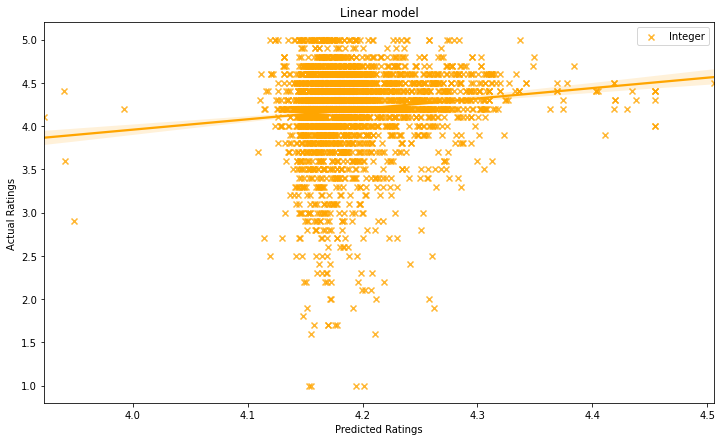

In [133]:
plt.figure(figsize=(12,7))
sns.regplot(results,y_te,color='orange', label = 'Integer', marker = 'x')
plt.legend()
plt.title('Linear model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

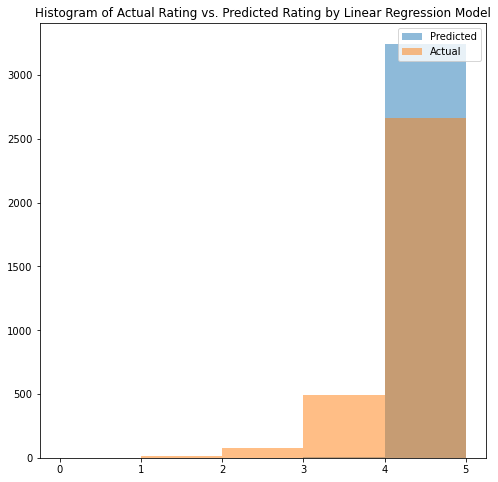

In [134]:
bins_list = [0,1,2,3,4,5]
plt.hist(results, bins_list, alpha=0.5, label='Predicted')
plt.hist(y_te, bins_list, alpha=0.5, label='Actual')
plt.legend(loc='upper right')
plt.title('Histogram of Actual Rating vs. Predicted Rating by Linear Regression Model')
plt.show()

In [135]:
print(results.mean(), results.std())

4.192197025251107 0.046114637749295286


### 2) Elipson-Support Vector Regression (SVR) Model

In [136]:
model2 = svm.SVR()
model2.fit(X_train,y_train)

results2 = model2.predict(X_test)

resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,results2, name = 'SVM - Integer'),ignore_index = True)

In [137]:
resultsdf

,Series Name,Mean Squared Error,Mean Absolute Error,Mean Squared Log Error
0,Linear - Integer,0.227089,0.31236,0.011054
1,SVM - Integer,0.230586,0.306344,0.0113035


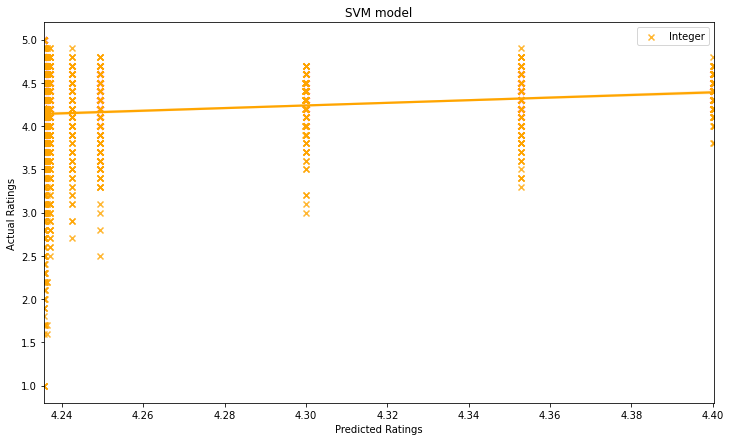

In [138]:
plt.figure(figsize=(12,7))
sns.regplot(results2,y_test,color='orange', label = 'Integer', marker = 'x')
plt.legend()
plt.title('SVM model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

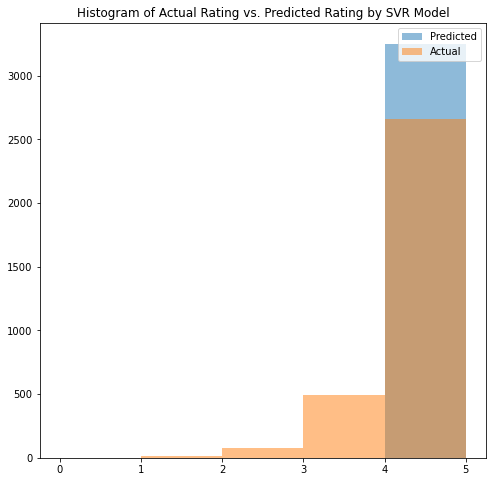

In [139]:
plt.hist(results2, bins_list, alpha=0.5, label='Predicted')
plt.hist(y_te, bins_list, alpha=0.5, label='Actual')
plt.legend(loc='upper right')
plt.title('Histogram of Actual Rating vs. Predicted Rating by SVR Model')
plt.show()

In [140]:
print(results2.mean(), results2.std())

4.267811611870988 0.05262215880506435


## 3) Random Forest Regressor Model

In [141]:
model3 = RandomForestRegressor()
model3.fit(X_train,y_train)
results3 = model3.predict(X_test)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,results3, name = 'RFR - Integer'),ignore_index = True)

In [142]:
print(model3.score(X_test,y_test))

-0.02679309813069186


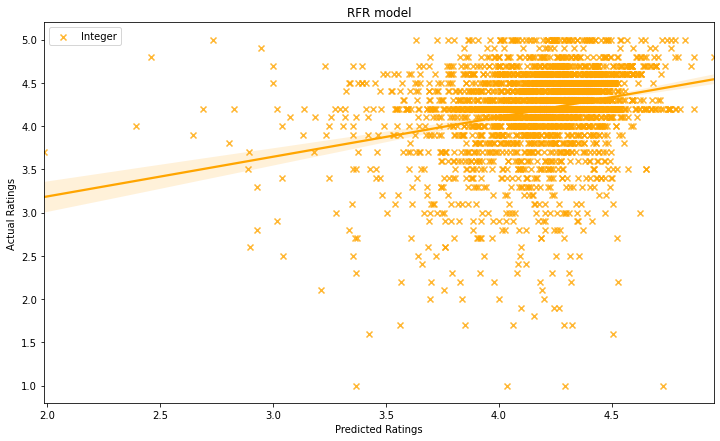

In [143]:
plt.figure(figsize=(12,7))
sns.regplot(results3,y_test,color='orange', label = 'Integer', marker = 'x')
plt.legend()
plt.title('RFR model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

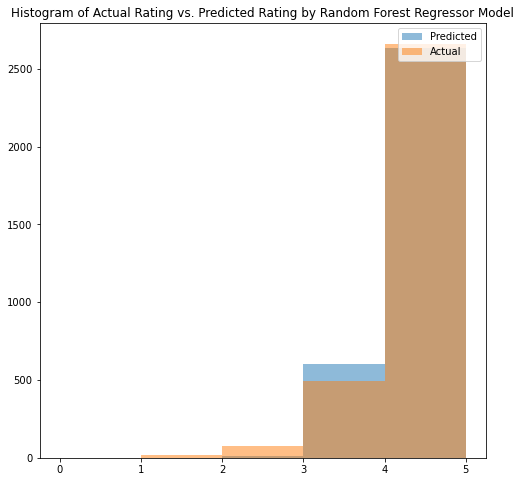

In [144]:
plt.hist(results3, bins_list, alpha=0.5, label='Predicted')
plt.hist(y_te, bins_list, alpha=0.5, label='Actual')
plt.legend(loc='upper right')
plt.title('Histogram of Actual Rating vs. Predicted Rating by Random Forest Regressor Model')
plt.show()

In [145]:
print(results3.mean(), results3.std())

4.185662252719508 0.273785611856853


## Comparing the models

In [146]:
resultsdf

,Series Name,Mean Squared Error,Mean Absolute Error,Mean Squared Log Error
0,Linear - Integer,0.227089,0.31236,0.011054
1,SVM - Integer,0.230586,0.306344,0.0113035
2,RFR - Integer,0.236229,0.324829,0.0113358


## 2. Dummy Coded + Median Imputed
##### a) Feature selection

In [147]:
df2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Last Updated', 'Month', 'Category_int', 'Genres_int', 'Type_int',
       'ContentRating_int', 'Rating_mean', 'Size_mean', 'Rating_med',
       'Size_med', 'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       'Category_COMMUNICATION', 'Category_DATING', 'Category_EDUCATION',
       'Category_ENTERTAINMENT', 'Category_EVENTS', 'Category_FAMILY',
       'Category_FINANCE', 'Category_FOOD_AND_DRINK', 'Category_GAME',
       'Category_HEALTH_AND_FITNESS', 'Category_HOUSE_AND_HOME',
       'Category_LIBRARIES_AND_DEMO', 'Category_LIFESTYLE',
       'Category_MAPS_AND_NAVIGATION', 'Category_MEDICAL',
       'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category

In [148]:
# Features selection
X_d = df2.drop(labels = ['Rating', 'Last Updated', 'Category_int', 'Genres_int', 'Type_int',
       'ContentRating_int', 'Rating_mean', 'Size_mean', 'Rating_med',
       'Size_med',],axis = 1)

In [149]:
# Label selection
y_d = df2.Rating_med

In [150]:
# For testing purpose
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)

## 1) Linear Regression

In [151]:
# Train the model on the train split
lm = LinearRegression().fit(X_train_d,y_train_d)

In [152]:
#make predictions using the model on both train and test splits
y_tr_pred = lm.predict(X_train_d)
y_te_pred = lm.predict(X_test_d)

In [153]:
results_d = y_te_pred
results_d

array([4.24336922, 4.05828678, 4.26975505, ..., 4.25100242, 4.12595385,
       4.07061156])

In [154]:
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,results_d, name = 'Linear - Dummy'),ignore_index = True)

In [155]:
resultsdf

,Series Name,Mean Squared Error,Mean Absolute Error,Mean Squared Log Error
0,Linear - Integer,0.227089,0.31236,0.011054
1,SVM - Integer,0.230586,0.306344,0.0113035
2,RFR - Integer,0.236229,0.324829,0.0113358
3,Linear - Dummy,0.237626,0.324813,0.0119086


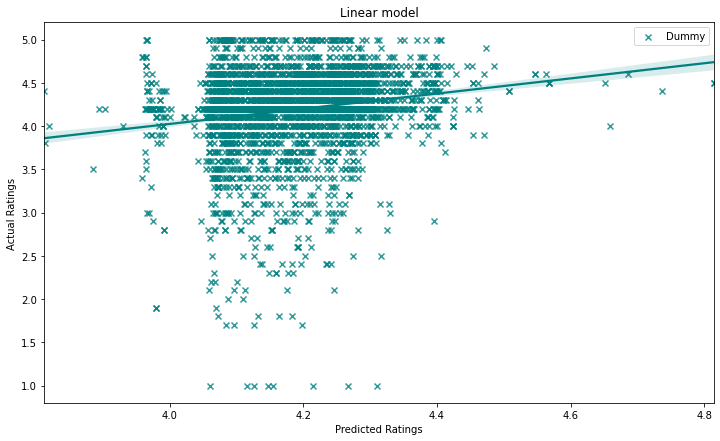

In [156]:
plt.figure(figsize=(12,7))
sns.regplot(results_d,y_test_d,color='teal', label = 'Dummy', marker = 'x')
plt.legend()
plt.title('Linear model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

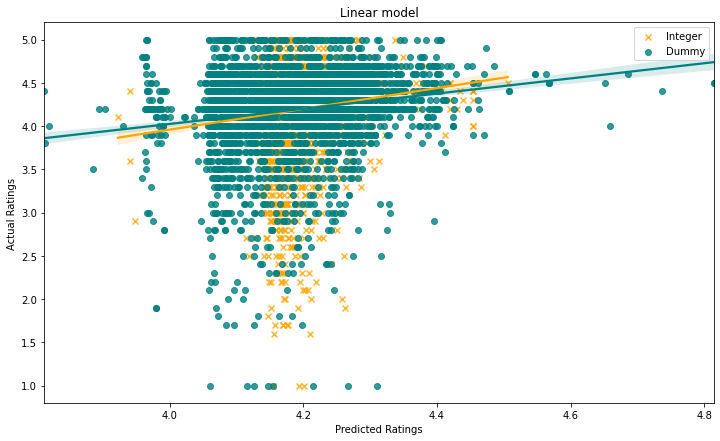

In [157]:
plt.figure(figsize=(12,7))
sns.regplot(results,y_test,color='orange', label = 'Integer', marker = 'x')
sns.regplot(results_d,y_test_d,color='teal',label = 'Dummy')
plt.legend()
plt.title('Linear model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

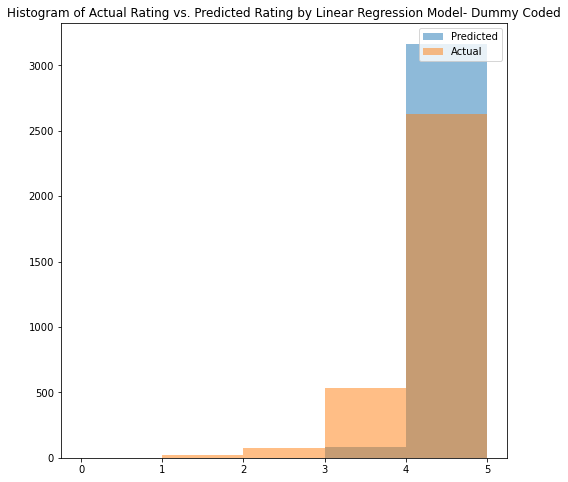

In [158]:
plt.hist(results_d, bins_list, alpha=0.5, label='Predicted')
plt.hist(y_test_d, bins_list, alpha=0.5, label='Actual')
plt.legend(loc='upper right')
plt.title('Histogram of Actual Rating vs. Predicted Rating by Linear Regression Model- Dummy Coded')
plt.show()

In [159]:
print(results.mean(), results.std())

4.192197025251107 0.046114637749295286


### 2) Elipson-Support Vector Regression (SVR) Model

In [160]:
model2 = svm.SVR()
model2.fit(X_train_d,y_train_d)

results2_d = model2.predict(X_test_d)

resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,results2_d, name = 'SVM - Dummy'),ignore_index = True)

In [161]:
resultsdf

,Series Name,Mean Squared Error,Mean Absolute Error,Mean Squared Log Error
0,Linear - Integer,0.227089,0.31236,0.011054
1,SVM - Integer,0.230586,0.306344,0.0113035
2,RFR - Integer,0.236229,0.324829,0.0113358
3,Linear - Dummy,0.237626,0.324813,0.0119086
4,SVM - Dummy,0.248181,0.318044,0.0125216


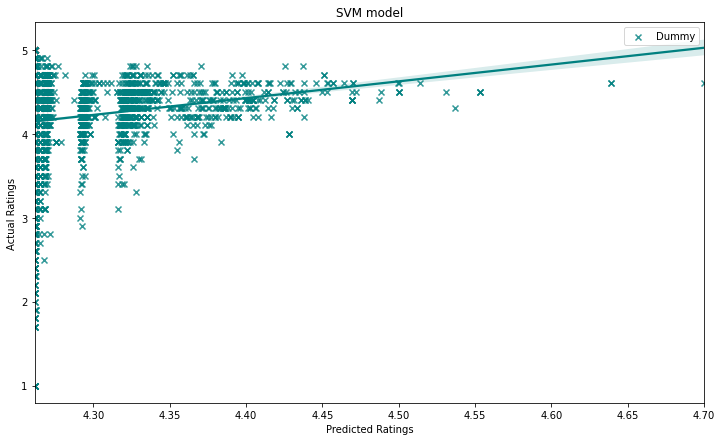

In [162]:
plt.figure(figsize=(12,7))
sns.regplot(results2_d,y_test_d,color='teal', label = 'Dummy', marker = 'x')
plt.legend()
plt.title('SVM model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

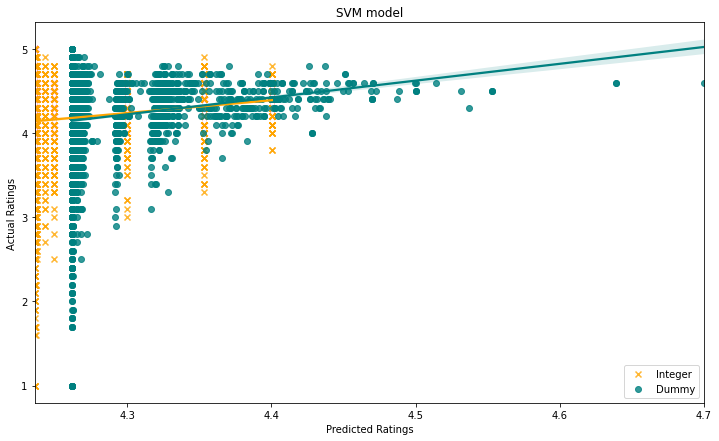

In [163]:
plt.figure(figsize=(12,7))
sns.regplot(results2,y_test,color='orange', label = 'Integer', marker = 'x')
sns.regplot(results2_d,y_test_d,color='teal',label = 'Dummy')
plt.legend()
plt.title('SVM model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

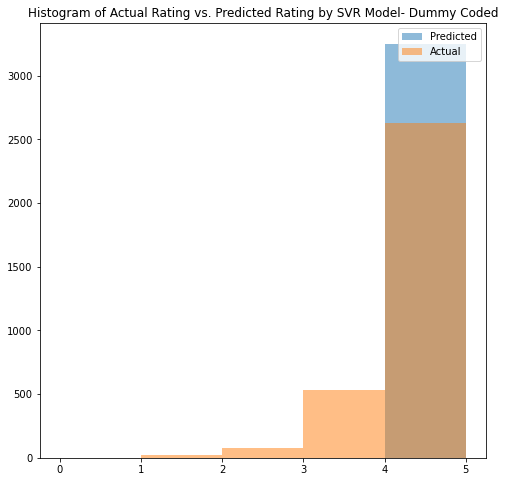

In [164]:
plt.hist(results2_d, bins_list, alpha=0.5, label='Predicted')
plt.hist(y_test_d, bins_list, alpha=0.5, label='Actual')
plt.legend(loc='upper right')
plt.title('Histogram of Actual Rating vs. Predicted Rating by SVR Model- Dummy Coded')
plt.show()

In [165]:
print(results2.mean(), results2.std())

4.267811611870988 0.05262215880506435


## 3) Random Forest Regressor Model

In [166]:
model3 = RandomForestRegressor()
model3.fit(X_train_d,y_train_d)
results3_d = model3.predict(X_test_d)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,results3, name = 'RFR - Dummy'),ignore_index = True)

In [167]:
print(model3.score(X_test_d,y_test_d))

0.15931428615983712


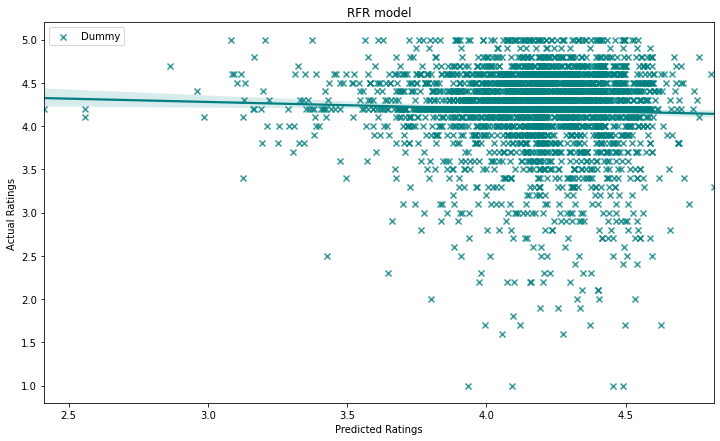

In [168]:
plt.figure(figsize=(12,7))
sns.regplot(results3_d,y_test,color='teal', label = 'Dummy', marker = 'x')
plt.legend()
plt.title('RFR model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

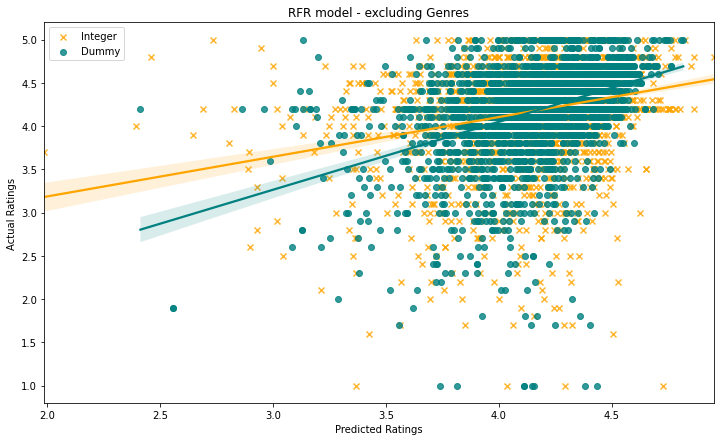

In [169]:
plt.figure(figsize=(12,7))
sns.regplot(results3,y_test,color='orange', label = 'Integer', marker = 'x')
sns.regplot(results3_d,y_test_d,color='teal',label = 'Dummy')
plt.legend()
plt.title('RFR model - excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

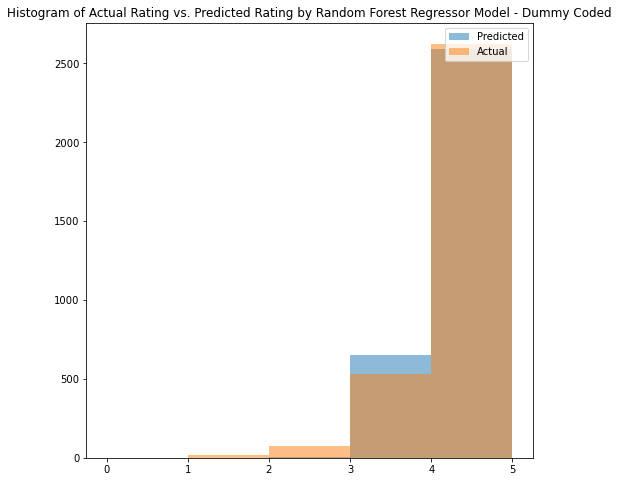

In [170]:
plt.hist(results3_d, bins_list, alpha=0.5, label='Predicted')
plt.hist(y_test_d, bins_list, alpha=0.5, label='Actual')
plt.legend(loc='upper right')
plt.title('Histogram of Actual Rating vs. Predicted Rating by Random Forest Regressor Model - Dummy Coded')
plt.show()

In [171]:
print(results3.mean(), results3.std())

4.185662252719508 0.273785611856853


In [172]:
resultsdf

,Series Name,Mean Squared Error,Mean Absolute Error,Mean Squared Log Error
0,Linear - Integer,0.227089,0.31236,0.011054
1,SVM - Integer,0.230586,0.306344,0.0113035
2,RFR - Integer,0.236229,0.324829,0.0113358
3,Linear - Dummy,0.237626,0.324813,0.0119086
4,SVM - Dummy,0.248181,0.318044,0.0125216
5,RFR - Dummy,0.236229,0.324829,0.0113358


## 3. Comparing the models

In [173]:
resultsdf

,Series Name,Mean Squared Error,Mean Absolute Error,Mean Squared Log Error
0,Linear - Integer,0.227089,0.31236,0.011054
1,SVM - Integer,0.230586,0.306344,0.0113035
2,RFR - Integer,0.236229,0.324829,0.0113358
3,Linear - Dummy,0.237626,0.324813,0.0119086
4,SVM - Dummy,0.248181,0.318044,0.0125216
5,RFR - Dummy,0.236229,0.324829,0.0113358


## V. Model Selection

#### 1. Define the pipeline

In [174]:
pipeall = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression,k='all'),
    LinearRegression()
)

#### 2. Fit the pipeline

In [175]:
pipeall.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k='all',
                             score_func=<function f_regression at 0x0000026E6B4EC430>)),
                ('linearregression', LinearRegression())])

### 7-2) Assess performance on train and test data

In [176]:
y_tr_pred = pipeall.predict(X_train)
y_te_pred = pipeall.predict(X_test)

In [177]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.009596877448298957, 0.01293515467980122)

In [178]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.31336100978990405, 0.3123604638670133)

Text(0, 0.5, 'Predictions')

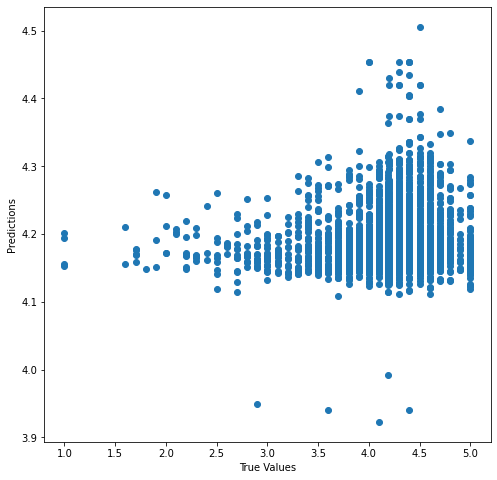

In [179]:
## The line / model
plt.scatter(y_test, y_te_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

### 7-3) Cross-Validation

In [180]:
cv_results = cross_validate(pipeall, X_train, y_train, cv=5)

In [181]:
cv_results

{'fit_time': array([0.01399922, 0.00899386, 0.01000023, 0.00999904, 0.0100019 ]),
 'score_time': array([0.00199819, 0.00199866, 0.00300074, 0.00199962, 0.00299978]),
 'test_score': array([ 0.00896844,  0.01689195, -0.00025671,  0.00225052,  0.00663333])}

In [182]:
cv_scores = cv_results['test_score']
cv_scores

array([ 0.00896844,  0.01689195, -0.00025671,  0.00225052,  0.00663333])

In [183]:
np.mean(cv_scores), np.std(cv_scores)

(0.00689750727330356, 0.005950208189038555)

In [184]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([-0.01,  0.02])

### 7-4) Hyperparameter search using GridSearchCV


In [185]:
pipeall.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize'])

In [186]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [187]:
lr_grid_cv = GridSearchCV(pipeall, param_grid=grid_params, cv=5, n_jobs=-1)

In [188]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(k='all',
                                                    score_func=<function f_regression at 0x0000026E6B4EC430>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1, param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7]})

In [189]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [190]:
lr_grid_cv.best_params_

{'selectkbest__k': 6}

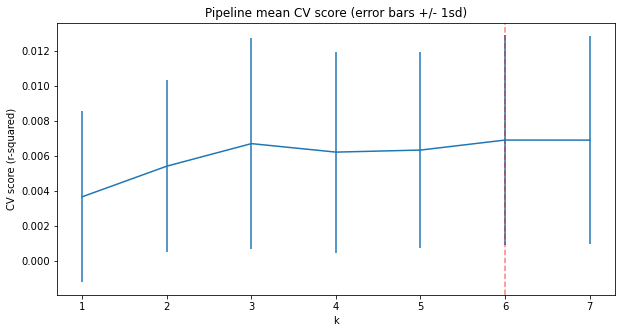

In [191]:
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [192]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [193]:
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

Size_med        0.031473
Installs        0.021934
Type_int        0.021360
Genres_int     -0.001617
Category_int   -0.005798
Price          -0.012133
dtype: float64

# 8. Random Forest Model

In [194]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
melb_preds = forest_model.predict(X_test)
print(mean_absolute_error(y_test, melb_preds))

0.3249837441372629


In [195]:
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=50)
)

In [196]:
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [197]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([-0.0175194 , -0.06453947, -0.02393716, -0.02176038,  0.03689538])

In [198]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(-0.018172205484057513, 0.03233851564304609)

In [199]:
y_predicted = forest_model.predict(X_test)

#### Hyperparameter search using GridSearchCV

In [200]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [201]:
rf_grid_cv = GridSearchCV(RF_pipe, grid_params, param_grid=dict, cv=5, n_jobs=-1)

In [ ]:
rf_grid_cv.fit(X_train, y_train)

In [ ]:
rf_grid_cv.best_params_

In [ ]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

In [ ]:
np.mean(rf_best_scores), np.std(rf_best_scores)

In [ ]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

## Selecting Models

#### Linear Regression Model

In [ ]:
# 'neg_mean_absolute_error' uses the (negative of) the mean absolute error
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [ ]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

In [ ]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

#### Random Forest Model

In [ ]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, n_jobs=-1)

In [ ]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

In [ ]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))